In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Загрузка данных
df = pd.read_csv('pokemon.csv')

# Просмотр первых нескольких строк данных
df.head()

#Импортируем библиотеку pandas, а также другие библиотеки, которые понадобятся для визуализации данных

,abilities,against_bug,against_dark,against_dragon,against_electric,against_fairy,against_fight,against_fire,against_flying,against_ghost,...,percentage_male,pokedex_number,sp_attack,sp_defense,speed,type1,type2,weight_kg,generation,is_legendary
0,"['Overgrow', 'Chlorophyll']",1.0,1.0,1.0,0.5,0.5,0.5,2.0,2.0,1.0,...,88.1,1,65,65,45,grass,poison,6.9,1,0
1,"['Overgrow', 'Chlorophyll']",1.0,1.0,1.0,0.5,0.5,0.5,2.0,2.0,1.0,...,88.1,2,80,80,60,grass,poison,13.0,1,0
2,"['Overgrow', 'Chlorophyll']",1.0,1.0,1.0,0.5,0.5,0.5,2.0,2.0,1.0,...,88.1,3,122,120,80,grass,poison,100.0,1,0
3,"['Blaze', 'Solar Power']",0.5,1.0,1.0,1.0,0.5,1.0,0.5,1.0,1.0,...,88.1,4,60,50,65,fire,NaN,8.5,1,0
4,"['Blaze', 'Solar Power']",0.5,1.0,1.0,1.0,0.5,1.0,0.5,1.0,1.0,...,88.1,5,80,65,80,fire,NaN,19.0,1,0


In [ ]:
df.info()

# общая информацию о таблице

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 801 entries, 0 to 800
Data columns (total 41 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   abilities          801 non-null    object 
 1   against_bug        801 non-null    float64
 2   against_dark       801 non-null    float64
 3   against_dragon     801 non-null    float64
 4   against_electric   801 non-null    float64
 5   against_fairy      801 non-null    float64
 6   against_fight      801 non-null    float64
 7   against_fire       801 non-null    float64
 8   against_flying     801 non-null    float64
 9   against_ghost      801 non-null    float64
 10  against_grass      801 non-null    float64
 11  against_ground     801 non-null    float64
 12  against_ice        801 non-null    float64
 13  against_normal     801 non-null    float64
 14  against_poison     801 non-null    float64
 15  against_psychic    801 non-null    float64
 16  against_rock       801 non

In [ ]:
# Проверка на пропуски
df.isnull().sum()

# Проверка типов данных
df.dtypes

,0
abilities,object
against_bug,float64
against_dark,float64
against_dragon,float64
against_electric,float64
against_fairy,float64
against_fight,float64
against_fire,float64
against_flying,float64
against_ghost,float64


In [ ]:
# Проверка названий столбцов в DataFrame
print(df.columns)

Index(['abilities', 'against_bug', 'against_dark', 'against_dragon',
       'against_electric', 'against_fairy', 'against_fight', 'against_fire',
       'against_flying', 'against_ghost', 'against_grass', 'against_ground',
       'against_ice', 'against_normal', 'against_poison', 'against_psychic',
       'against_rock', 'against_steel', 'against_water', 'attack',
       'base_egg_steps', 'base_happiness', 'base_total', 'capture_rate',
       'classfication', 'defense', 'experience_growth', 'height_m', 'hp',
       'japanese_name', 'name', 'percentage_male', 'pokedex_number',
       'sp_attack', 'sp_defense', 'speed', 'type1', 'type2', 'weight_kg',
       'generation', 'is_legendary'],
      dtype='object')


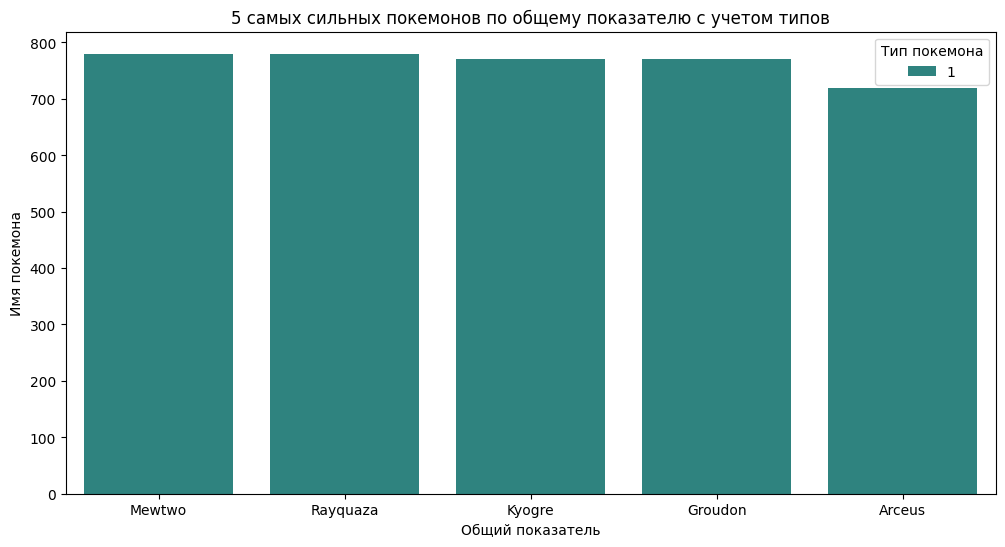

In [ ]:
# Самые сильные покемоны по общему показателю

# Визуализация с учетом типов покемонов
strongest_pokemons = df.nlargest(5, 'base_total')[['name', 'base_total', 'type1', 'type2', 'is_legendary']]

plt.figure(figsize=(12, 6))
sns.barplot(x='name', y='base_total', data=strongest_pokemons, palette='viridis', hue='is_legendary')
plt.title('5 самых сильных покемонов по общему показателю с учетом типов')
plt.xlabel('Общий показатель')
plt.ylabel('Имя покемона')
plt.legend(title='Тип покемона')
plt.show()

In [ ]:
# На графике представлены 5 самых сильных покемонов по общему показателю. Можно заметить, что легендарные покемоны часто занимают верхние позиции.

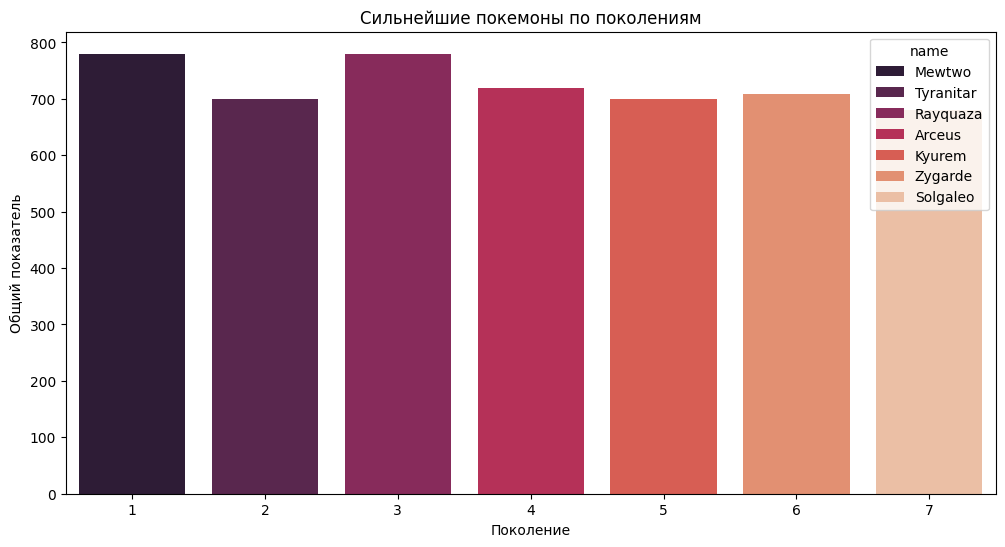

In [ ]:
# Сильнейшие покемоны каждого поколения
best_by_gen = df.loc[df.groupby('generation')['base_total'].idxmax()]
plt.figure(figsize=(12, 6))
sns.barplot(data=best_by_gen, x='generation', y='base_total', hue='name', dodge=False, palette='rocket')
plt.title('Сильнейшие покемоны по поколениям')
plt.xlabel('Поколение')
plt.ylabel('Общий показатель')
plt.show()

In [ ]:
#На графике видно, что в каждом поколении есть свои сильнейшие покемоны, и их показатели варьируются.
#Например, в 1-м поколении это Mewtwo, а в 7-м — Solgaleo. Легендарные покемоны чаще становятся сильнейшими в своих поколениях.

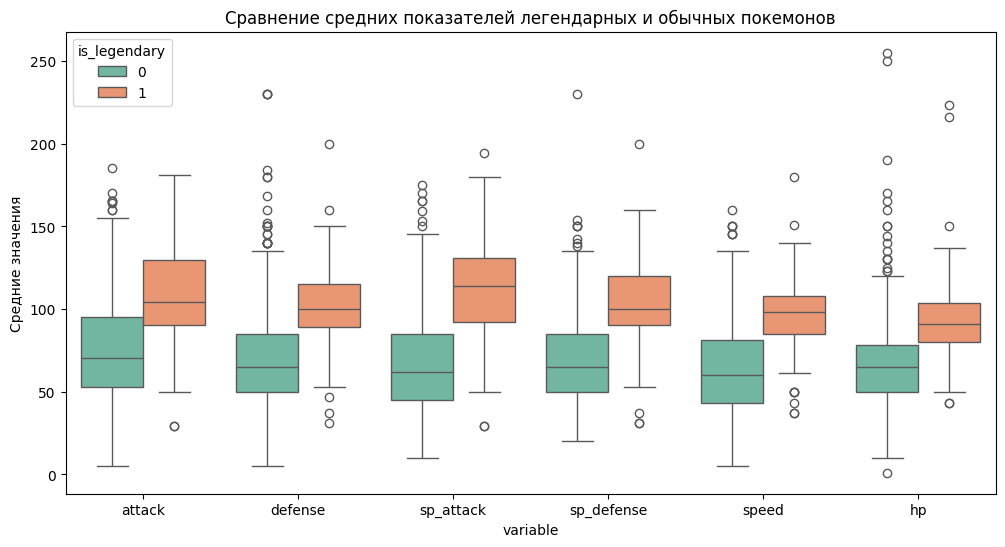

In [ ]:
# Сравнение легендарных и обычных покемонов

legendary = df[df['is_legendary'] == 1]
non_legendary = df[df['is_legendary'] == 0]

plt.figure(figsize=(12, 6))
sns.boxplot(data=pd.melt(df, id_vars=['is_legendary'],
                         value_vars=['attack', 'defense', 'sp_attack', 'sp_defense', 'speed', 'hp']),
            x='variable', y='value', hue='is_legendary', palette='Set2')
plt.title('Распределение характеристик: легендарные vs обычные')
plt.title('Сравнение средних показателей легендарных и обычных покемонов')
plt.ylabel('Средние значения')
plt.xticks(rotation=0)
plt.show()

In [ ]:
# Легендарные покемоны имеют значительно более высокие средние показатели по всем характеристикам по сравнению с обычными покемонами.

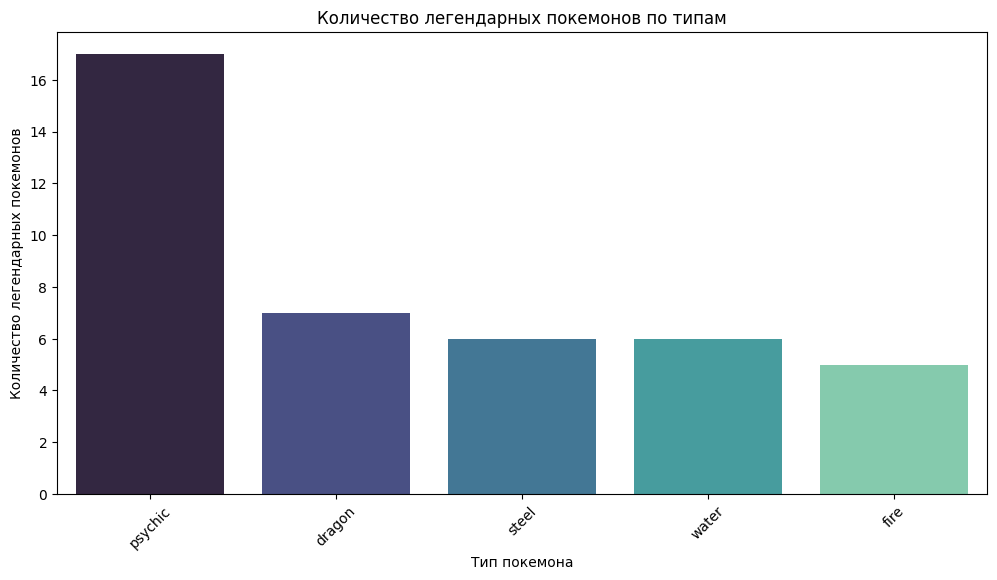

In [ ]:
# Распределяем типы покемонов и считаем легендарных
legendary_types = legendary.groupby('type1').size().sort_values(ascending=False).head(5)
plt.figure(figsize=(12, 6))
sns.barplot(
    x=legendary_types.index,
    y=legendary_types.values,
    hue=legendary_types.index,
    palette='mako',
    legend=False)
plt.title('Количество легендарных покемонов по типам')
plt.xlabel('Тип покемона')
plt.ylabel('Количество легендарных покемонов')
plt.xticks(rotation=45)
plt.show()

In [ ]:
# На графике видно, что некоторые типы покемонов, такие как "Dragon" и "Psychic", имеют большее количество легендарных представителей.
# Это может указывать на то, что определенные типы покемонов чаще становятся легендарными

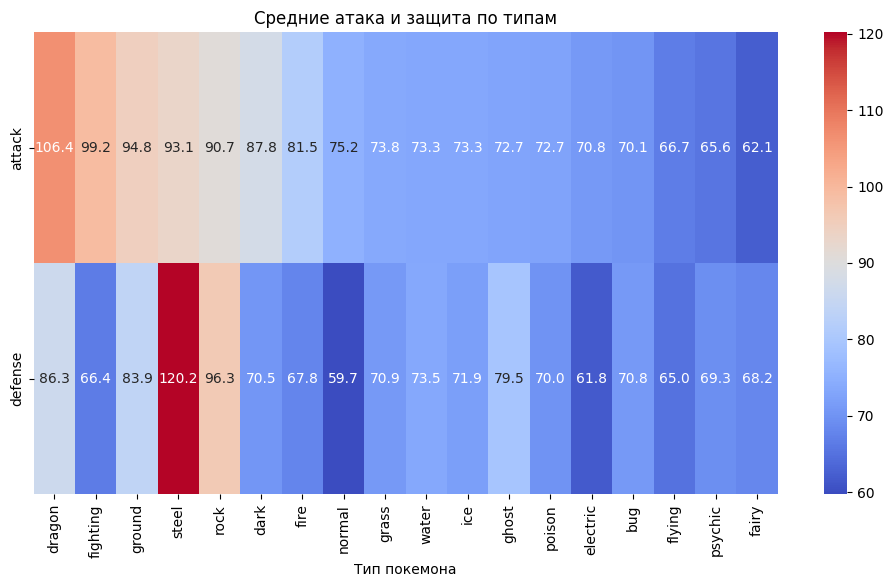

In [ ]:
# Средние характеристики покемонов по типам и поколениям
avg_stats = df.groupby('type1')[['attack', 'defense']].mean().sort_values('attack', ascending=False)
plt.figure(figsize=(12, 6))
sns.heatmap(avg_stats.T, annot=True, cmap='coolwarm', fmt=".1f")
plt.title('Средние атака и защита по типам')
plt.xlabel('Тип покемона')
plt.show()

In [ ]:
# На карте видно, что некоторые типы покемонов, такие как "Steel" и "Dragon", имеют высокие средние значения.
# Это может указывать на их силу и популярность в боях.

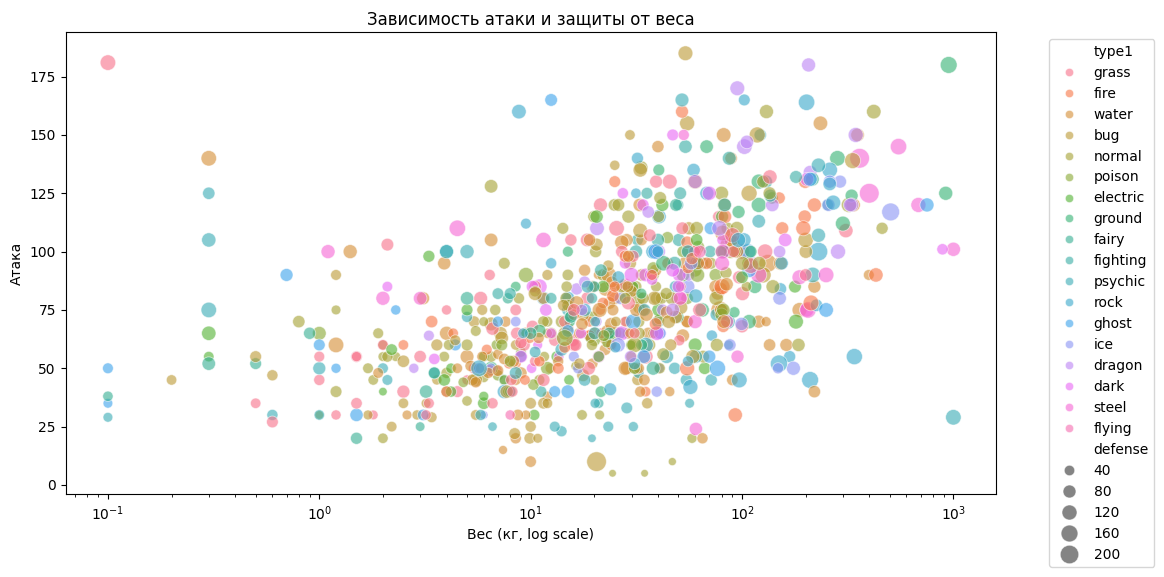

In [ ]:
# Связь характеристик и веса покемонов
plt.figure(figsize=(12, 6))
sns.scatterplot(data=df, x='weight_kg', y='attack', hue='type1', size='defense', sizes=(30, 200), alpha=0.6)
plt.xscale('log')
plt.title('Зависимость атаки и защиты от веса')
plt.xlabel('Вес (кг, log scale)')
plt.ylabel('Атака')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

In [ ]:
# На графике видно, что между весом и общим показателем покемонов существует положительная зависимость, но она не является строго линейной.
# Легендарные покемоны, как правило, имеют более высокие значения общего показателя.

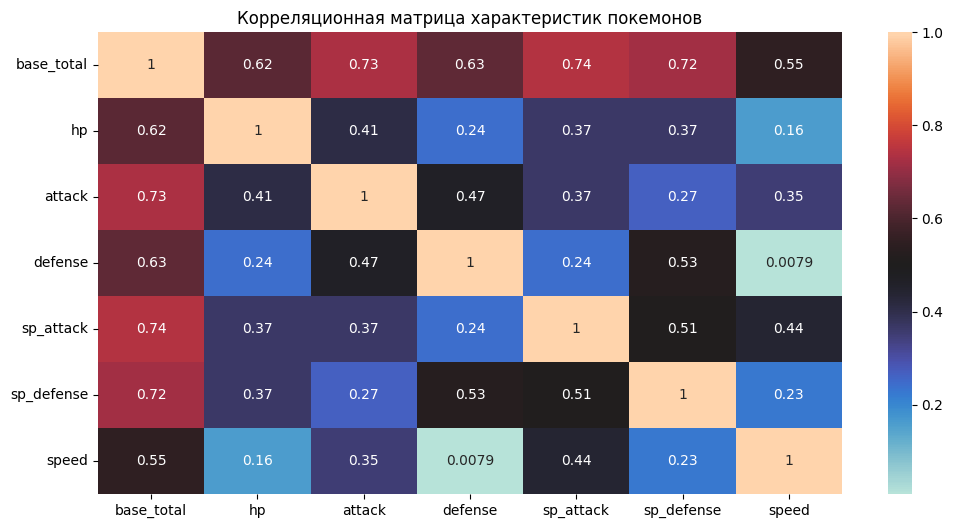

In [ ]:
# Корреляционный анализ
corr = df[['base_total', 'hp', 'attack', 'defense', 'sp_attack', 'sp_defense', 'speed']].corr()
plt.figure(figsize=(12, 6))
sns.heatmap(corr, annot=True, cmap='icefire', center=0.5)
plt.title('Корреляционная матрица характеристик покемонов')
plt.show()

In [ ]:
# Корреляционная матрица показывает, что Total имеет высокую положительную корреляцию с attack, defense, sp_Attack, Sp_defense и speed.
# Это указывает на то, что эти характеристики являются ключевыми для предсказания силы покемона.

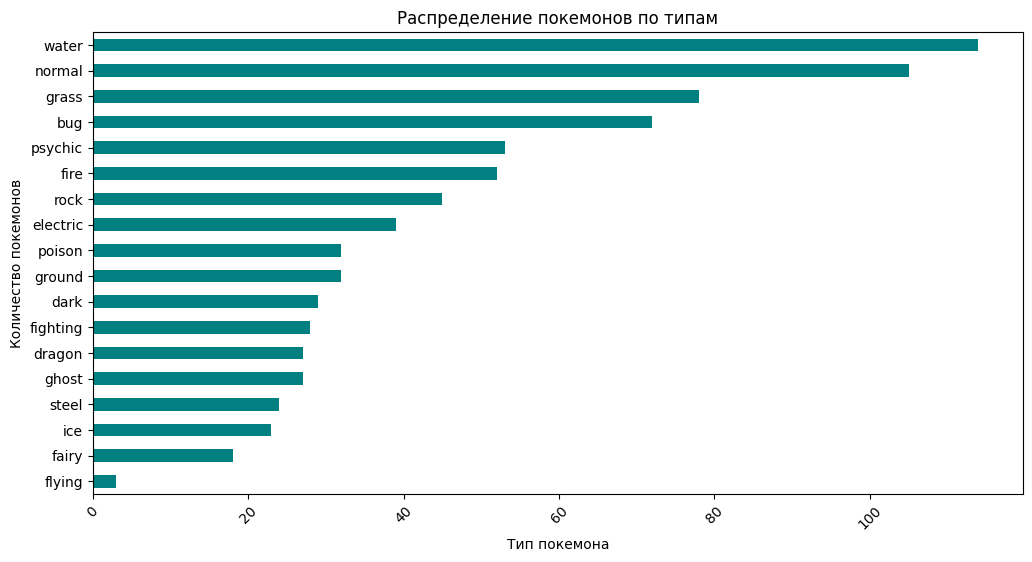

In [ ]:
# Распределение покемонов по основному типу
plt.figure(figsize=(12, 6))
df['type1'].value_counts().sort_values().plot(kind='barh', color='teal')
plt.title('Распределение покемонов по типам')
plt.xlabel('Тип покемона')
plt.ylabel('Количество покемонов')
plt.xticks(rotation=45)
plt.show()

In [ ]:
# На графике видно, что некоторые типы покемонов, такие как "Water", "Normal" и "Grass", имеют наибольшее количество представителей.
# Это может указывать на то, что эти типы более распространены в мире покемонов.

In [ ]:
#ВЫВОДЫ:

# Сильнейшие покемоны: Легендарные покемоны часто занимают верхние позиции по общему показателю.
# Поколения: Каждый поколение имеет своих сильнейших покемонов, и их показатели варьируются.
# Легендарные покемоны: Они имеют значительно более высокие средние показатели по всем характеристикам по сравнению с обычными покемонами.
# Типы покемонов: Некоторые типы, такие как "Dragon" и "Psychic", имеют большее количество легендарных представителей.